In [1]:
# script to get and plot TTS for campaign average conditions, varying tau 
# date created: 2/16/2020
# author: sofia chelpon


In [2]:
############################ PREP WORKSPACE ############################

In [1]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [7]:
# read in ratios dataframe
contrast_ratios = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/contrast_ratios_twp_OHvar.pkl")
contrast_ratios.head()

,Instrument,Trace_Gas,TROPO_tau_lowOH,TROPO_tau_meanOH,TROPO_tau_highOH,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14,RF15
0,AWAS,C2H6_Ethane,38.401740,48.196029,78.526155,0.598920,NaN,NaN,0.530514,0.374649,0.574789,0.521834,NaN,0.862412,0.867341,NaN,NaN,NaN,0.694157
1,AWAS,C2H2_Ethyne,11.221719,9.455625,8.785293,0.467306,NaN,NaN,0.325139,0.284318,0.578051,0.434454,NaN,1.215641,0.864908,NaN,NaN,NaN,0.532719
2,AWAS,C3H8_Propane,8.722179,8.923267,10.541806,0.281993,NaN,NaN,0.181851,0.150626,0.413577,0.242300,NaN,1.164780,0.886752,NaN,NaN,NaN,0.620690
3,AWAS,C4H10_Isobutane,4.502422,3.969291,3.710606,0.197171,NaN,NaN,0.125051,0.121909,0.540793,0.180229,NaN,1.450550,0.933333,NaN,NaN,NaN,0.561290
4,AWAS,C4H10_nButane,4.055000,3.754795,3.782950,0.207489,NaN,NaN,0.148701,0.138633,0.572463,0.175000,NaN,1.314560,1.128682,NaN,NaN,NaN,0.692473


In [8]:
ratios_sort = contrast_ratios.sort_values(['TROPO_tau_lowOH'])
ratios_sort.head()

# utbl, same for all 
utbl = ratios_sort['All RF']

In [3]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [9]:
# --------------- ver 1: TROPO tau low OH 
tau_low = ratios_sort['TROPO_tau_lowOH'].values

# get inputs
t_low, exp_decay_matrix_low, LT_low = tts_mod.prep_for_tts(tau_low)
# get tts 
my_mustar_low, my_r2_low, my_gf_low, my_t_low, mean_age_low, \
    mode_age_low, best_k_low = tts_mod.get_tts(utbl, tau_low, t_low, exp_decay_matrix_low, LT_low)

In [10]:
# --------------- ver 2: TROPO tau mean OH 
tau_mean = ratios_sort['TROPO_tau_meanOH'].values

# get inputs
t_mean, exp_decay_matrix_mean, LT_mean = tts_mod.prep_for_tts(tau_mean)
# get tts 
my_mustar_mean, my_r2_mean, my_gf_mean, my_t_mean, mean_age_mean, \
    mode_age_mean, best_k_mean = tts_mod.get_tts(utbl, tau_mean, t_mean, exp_decay_matrix_mean, LT_mean)

In [11]:
# --------------- ver 2: BL UT
tau_high = ratios_sort['TROPO_tau_highOH'].values

# get inputs
t_high, exp_decay_matrix_high, LT_high = tts_mod.prep_for_tts(tau_high)
# get tts 
my_mustar_high, my_r2_high, my_gf_high, my_t_high, mean_age_high, \
    mode_age_high, best_k_high = tts_mod.get_tts(utbl, tau_high, t_high, exp_decay_matrix_high, LT_high)

In [12]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################
# import my TTS module, need to add path to folder
import imp
imp.reload(tts_mod)

<module 'tts_mod' from '/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py'>

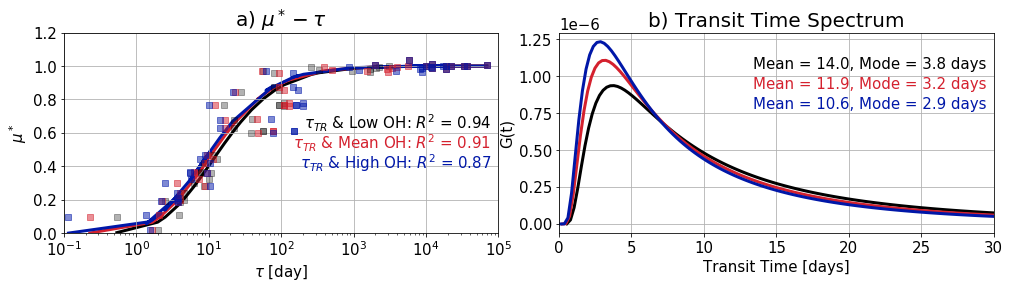

In [15]:
# --------------- start plot with BL case
title_str = r'$\tau_{TR}$ & Low OH: '
my_color = 'k'
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_low, my_mustar_low, utbl, my_r2_low, my_gf_low, 
                                        my_t_low, mean_age_low, mode_age_low, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)



# --------------- add TROPO case 
title_str = r'$\tau_{TR}$ & Mean OH: '
my_color = [0.83, 0.13, 0.18]
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau_mean, my_mustar_mean, utbl, my_r2_mean, 
                                             my_gf_mean, my_t_mean, mean_age_mean, 
                                             mode_age_mean, my_color, overplot, add_scatter, 
                                             add_r2, add_meanmode, my_ax, width, 
                                             height, title_str)

# --------------- add UT case 
title_str = r'$\tau_{TR}$ & High OH: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 2
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau_high, my_mustar_high, utbl, my_r2_high, my_gf_high, 
                                        my_t_high, mean_age_high, mode_age_high, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- save figure 
#fig.savefig('./tts_vary_tau_twp.pdf')  
#fig.savefig(svpath + 'tts_vary_tau.svg')  

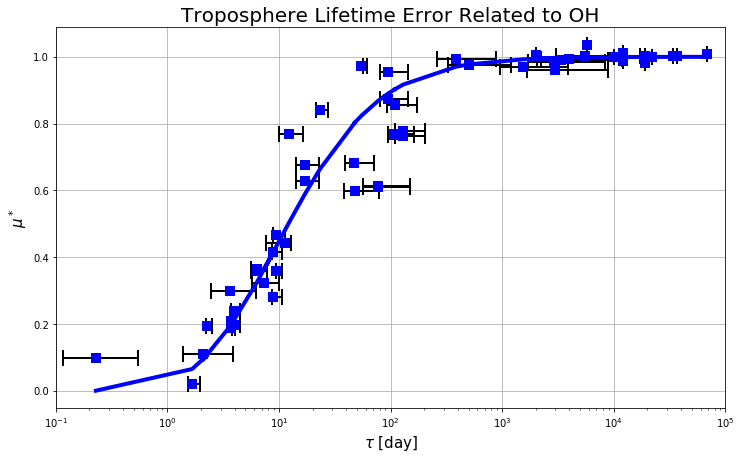

In [79]:
# error bars 
upper_err = tau_high - tau_mean
upper_err = upper_err.reshape(1, 52)
lower_err = tau_mean - tau_low
lower_err = lower_err.reshape(1, 52)

xerr = np.append(lower_err, upper_err, axis = 0)

# plot 
fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot()
plt.errorbar(tau_mean, utbl, yerr=None, xerr=xerr, fmt='s', capsize = 8, 
            mfc='blue', mec = 'blue', ms=8, mew=2, elinewidth = 2, ecolor = 'k')
plt.plot(tau_mean, my_mustar_mean, color = 'blue',  linewidth = 4)
ax.set_xscale('log')
ax.set_xlim([10**-1, 10**5])
ax.set_title('Troposphere Lifetime Error Related to OH', fontsize = 20)
ax.set_xlabel(r'$\tau$ [day]', fontsize = 15)
ax.set_ylabel(r'$\mu^*$', fontsize = 15)
plt.grid(which = 'major')